In [1]:
import matplotlib.pyplot as plt
plt.style.use(['seaborn-notebook', 'seaborn-white', 'seaborn-ticks'])

import numpy as np

import mlgrad.avragg as avragg
import mlgrad.model as model
import mlgrad.func as func
#import mlgrad.regular as regular
import mlgrad.loss as loss
import mlgrad.weights as weights
import mlgrad.averager as averager
import mlgrad.normalizer as normalizer

import sklearn.linear_model as linear_model
import sklearn.preprocessing as preprocessing

from mlgrad import averager_it, averager_fg, fg, erm_fg, irgd, erm_irgd, erisk, aerisk

import pandas as pd

In [57]:
df = pd.read_csv('data/stackloss.csv')
df

,STACKLOSS,AIRFLOW,WATERTEMP,ACIDCONC
0,42,80,27,89
1,37,80,27,88
2,37,75,25,90
3,28,62,24,87
4,18,62,22,87
5,18,62,23,87
6,19,62,24,93
7,20,62,24,93
8,15,58,23,87
9,14,58,18,80


In [58]:
X = df["WATERTEMP"].values.reshape((-1,1))
X = np.asarray(X, "d")
X = preprocessing.scale(X)
# X = np.log(X)
Y = df["STACKLOSS"].values
Y = np.asarray(Y, "d")
Y = preprocessing.scale(Y)
# Y = np.log(Y)
XY = np.c_[X, Y]
N = len(XY)
Z = np.zeros(N, 'd')

xrange = np.array(np.linspace(X.min(),X.max(),10)).reshape(-1,1)

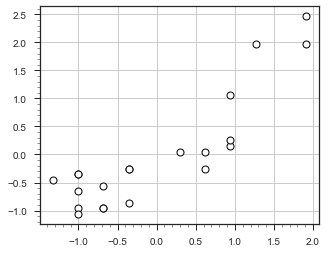

0.19047619047619047


In [59]:
plt.figure(figsize=(5.0, 4.0))
plt.scatter(X, Y, s=49, c='w', edgecolors='k', linewidth=1.)
plt.minorticks_on()
plt.grid(1)
plt.show()

print(4/len(XY))

In [60]:
loss_func_sq = loss.ErrorLoss(func.Square())
loss_func_abs = loss.ErrorLoss(func.Absolute())
loss_func_hub = loss.ErrorLoss(func.Huber())
# loss_func_sqrt = loss.ErrorLoss(func.Sqrt())
loss_func_logsq = loss.ErrorLoss(func.LogSquare())
# loss_func_abs = loss.ErrorLoss(func.Absolute())
loss_func_tukey = loss.ErrorLoss(func.Tukey())

linear_normalizer = normalizer.LinearModelNormalizer()

In [61]:
def as_y_on_X(lm_line):
    lm_line1 = model.LinearModel(lm_line.param[:-1])
    n = len(lm_line.param)
    for i in range(n-1):
        lm_line1.param[i] = -lm_line.param[i] / lm_line.param[n-1]
    return lm_line1
    

2441
[ 7.95744012e-05  7.29331155e-01 -6.84160848e-01]


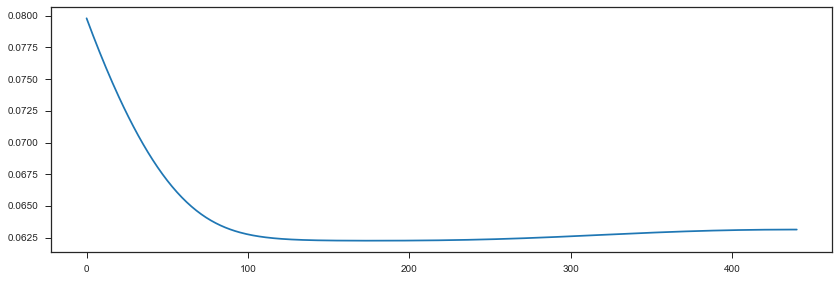

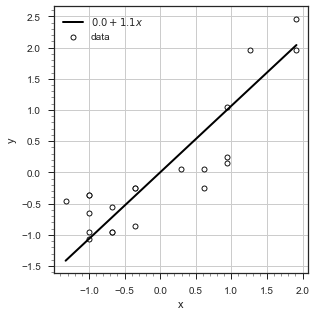

In [62]:
m = XY.shape[1] + 1
param_init = np.array(np.random.random(m))
lm_line_sq = model.LinearModel(param_init)
er_sq = erisk(XY, Z, lm_line_sq, loss_func_sq)
alg_sq = erm_fg(er_sq, h=0.001, tol=1.0e-8, n_iter=1000, n_restart=10, normalizer=linear_normalizer)
print(alg_sq.K)
print(lm_line_sq.param.base)

lm_line_sq1 = as_y_on_X(lm_line_sq)

plt.figure(figsize=(14, 4.5))
plt.plot(alg_sq.lvals)
plt.show()


plt.figure(figsize=(4.5, 4.5))
plt.scatter(X, Y, s=25, marker='o', c='w', edgecolors='k', linewidths=0.9, label='data')
plt.plot(xrange, lm_line_sq1.evaluate_all(xrange), color='k', linewidth=2., 
         label=r'$%.1f+%.1fx$' % tuple(lm_line_sq1.param), linestyle='-')
plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.minorticks_on()
plt.legend()
plt.tight_layout()
# plt.savefig('fig/rob_ml2_linear_0.eps')
plt.show()

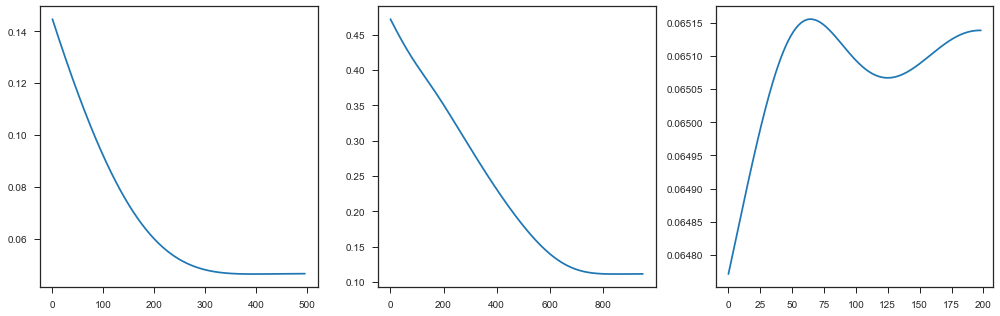

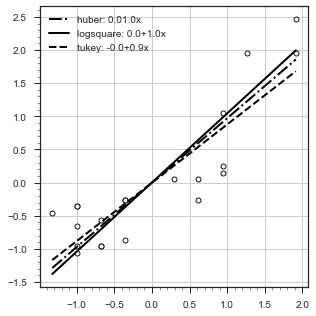

In [63]:
m = XY.shape[1] + 1
param_init_hub = np.array(np.random.random(m))
# param_init_sqrt = np.array(np.random.random(m))
param_init_logsq = np.array(np.random.random(m))
param_init_tukey = np.array(np.random.random(m))

lm_line_hub = model.LinearModel(param_init_hub)
# lm_line_sqrt = model.LinearModel(param_init_sqrt)
lm_line_logsq = model.LinearModel(param_init_logsq)
lm_line_tukey = model.LinearModel(param_init_tukey)

# er2_sqrt = erisk(XY, Z, lm_line_sqrt, loss_func_sqrt)
er_hub = erisk(XY, Z, lm_line_hub, loss_func_hub)
er_logsq = erisk(XY, Z, lm_line_logsq, loss_func_logsq)
er_tukey = erisk(XY, Z, lm_line_tukey, loss_func_tukey)

alg_hub = erm_fg(er_hub, h=0.001, tol=1.0e-8, n_iter=1000, n_restart=10, normalizer=linear_normalizer)
# alg_sqrt = erm_fg(er_sqrt, h=0.001, tol=1.0e-8, n_iter=1000, n_restart=10, normalizer=linear_normalizer)
alg_logsq = erm_fg(er_logsq, h=0.001, tol=1.0e-8, n_iter=1000, n_restart=10, normalizer=linear_normalizer)
alg_tukey = erm_fg(er_tukey, h=0.001, tol=1.0e-8, n_iter=1000, n_restart=10, normalizer=linear_normalizer)

lm_line_hub1 = as_y_on_X(lm_line_hub)
lm_line_logsq1 = as_y_on_X(lm_line_logsq)
lm_line_tukey1 = as_y_on_X(lm_line_tukey)

plt.figure(figsize=(14, 4.5))
plt.subplot(1, 3, 1)
plt.plot(alg_hub.lvals)
plt.subplot(1, 3, 2)
plt.plot(alg_logsq.lvals)
plt.subplot(1, 3, 3)
plt.plot(alg_tukey.lvals)
plt.tight_layout()
plt.show()

plt.figure(figsize=(4.5, 4.5))
plt.scatter(X, Y, s=25, marker='o', c='w', edgecolors='k', linewidths=0.9) #, label='data')
# plt.plot(xrange, alg2_sqrt.risk.model.evaluate_all(xrange0), color='k', linewidth=2., label='$sqrt$', linestyle=':')
plt.plot(xrange, lm_line_hub1.evaluate_all(xrange), color='k', linewidth=2., label='huber: %.1f%.1fx' % tuple(lm_line_hub1.param), linestyle='-.')
plt.plot(xrange, lm_line_logsq1.evaluate_all(xrange), color='k', linewidth=2., label='logsquare: %.1f+%.1fx' % tuple(lm_line_logsq1.param), linestyle='-')
plt.plot(xrange, lm_line_tukey1.evaluate_all(xrange), color='k', linewidth=2., label='tukey: %.1f+%.1fx' % tuple(lm_line_tukey1.param), linestyle='--')
plt.grid(1)
plt.minorticks_on()
plt.legend()
plt.tight_layout()
plt.savefig("fig/rb_ml_linear_0_classic.eps")
plt.show()

In [64]:
# alg_ridge = linear_model.Ridge(alpha=100.)
# alg_ridge.fit(X1s, Y1)
# alg_lasso = linear_model.Lasso(alpha=100.)
# alg_lasso.fit(X1s, Y1)

# plt.figure(figsize=(4.5, 4.5))
# plt.title("%.1f%% выбросов" % Q)
# plt.scatter(X1, Y1, s=25, marker='o', c='w', edgecolors='k', linewidths=0.9) #, label='data')
# plt.plot(xrange0, alg_lasso.predict(xrange0), color='k', linewidth=2., label=r'LASSO', linestyle='-.')
# plt.plot(xrange0, alg_ridge.predict(xrange0), color='k', linewidth=2., label=r'RIDGE', linestyle='--')
# plt.grid(1)
# plt.minorticks_on()
# plt.legend()
# plt.tight_layout()
# plt.savefig("fig/resistant_linear_lasso_80.png")
# plt.show()

No handles with labels found to put in legend.


K=22 param=[ 0.36094388 -0.51795015  0.8554108 ]


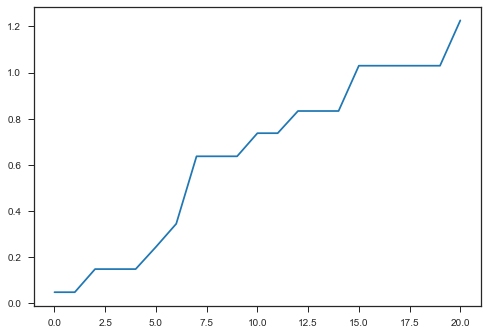

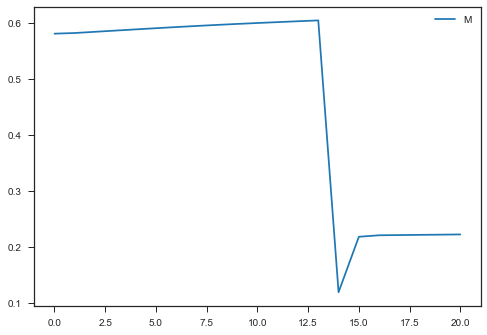

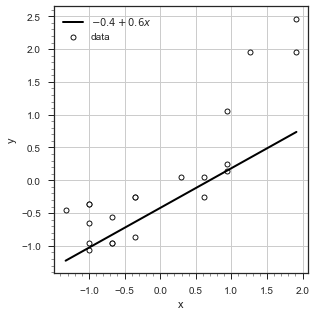

In [68]:
m = XY.shape[1] + 1
param_init3_m = np.array(np.random.random(m))

lm_line3_m = model.LinearModel(param_init3_m)

er3_m = erisk(XY, Z, lm_line3_m, loss_func_sq)
fg3_m = fg(er3_m, h=0.001, tol=1.0e-8, n_iter=1000, stop_condition='diffL2', normalizer=linear_normalizer)

avg3_m = averager_it(func.QuantileFunc(0.81, func.Sqrt(0.001)))
# avg3_m = averager_it(func.Power(1.05, 0.01))

wg3_m = weights.MWeights(avg3_m, er3_m, use_best_u=1)

alg3_m = erm_irgd(fg3_m, wg3_m, n_iter=21, tol=1.0e-7, verbose=1)

lm_line3_m1 = as_y_on_X(lm_line3_m)

plt.plot(sorted(np.abs(lm_line3_m1.evaluate_all(XY))))
plt.legend()
plt.show()

plt.plot(alg3_m.lvals, label='M')
plt.legend()
plt.show()

plt.figure(figsize=(4.5, 4.5))
plt.scatter(X, Y, s=25, marker='o', c='w', edgecolors='k', linewidths=0.9, label='data')
plt.plot(xrange, lm_line3_m1.evaluate_all(xrange), color='k', linewidth=2., 
         label=r'$%.1f+%.1fx$' % tuple(lm_line3_m1.param), linestyle='-')
plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.minorticks_on()
plt.legend()
plt.tight_layout()
# plt.savefig('fig/rob_ml2_linear_0.eps')
plt.show()

K=201 param=[ 0.297734   -0.36049393  0.93276156]


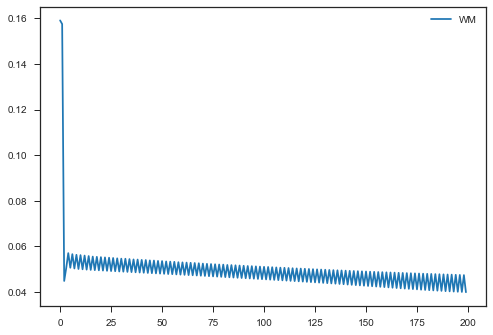

In [69]:
m = XY.shape[1] + 1
param_init3_wm = np.array(np.random.random(m))

lm_line3_wm = model.LinearModel(param_init3_wm)

er3_wm = erisk(XY, Z, lm_line3_wm, loss_func_sq)
fg3_wm = fg(er3_wm, h=0.001, tol=1.0e-8, n_iter=1000, stop_condition='diffL2', normalizer=linear_normalizer)
alpha = 0.8

avg3_wm = averager_it(func.QuantileFunc(alpha, func.Sqrt(0.001)))
avg3_wm = avragg.WMAverage(avg3_wm)
wg3_wm = weights.MWeights(avg3_wm, er3_wm)

alg3_wm = erm_irgd(fg3_wm, wg3_wm, n_iter=200, tol=1.0e-7, verbose=1)
plt.plot(alg3_wm.lvals, label='WM')
plt.legend()
plt.show()

No handles with labels found to put in legend.


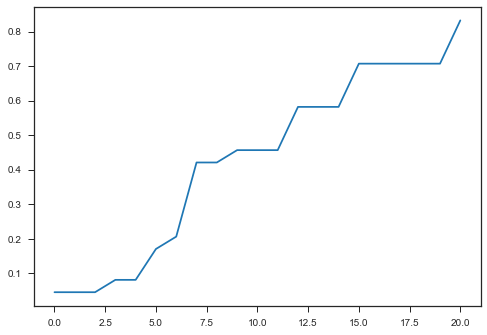

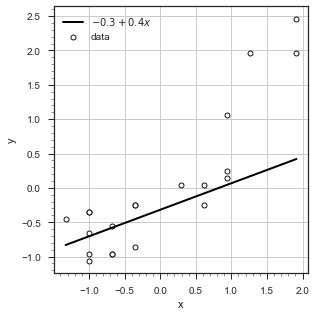

In [70]:
lm_line3_wm1 = as_y_on_X(lm_line3_wm)

plt.plot(sorted(np.abs(lm_line3_wm1.evaluate_all(XY))))
plt.legend()
plt.show()

plt.figure(figsize=(4.5, 4.5))
plt.scatter(X, Y, s=25, marker='o', c='w', edgecolors='k', linewidths=0.9, label='data')
plt.plot(xrange, lm_line3_wm1.evaluate_all(xrange), color='k', linewidth=2., 
         label=r'$%.1f+%.1fx$' % tuple(lm_line3_wm1.param), linestyle='-')
plt.grid(1)
plt.xlabel('x')
plt.ylabel('y')
plt.minorticks_on()
plt.legend()
plt.tight_layout()
# plt.savefig('fig/rob_ml2_linear_0.eps')
plt.show()